# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [14]:
# Intialize lists and variables to prepare for the API calls
url = "https://api.openweathermap.org/data/2.5/weather?"
found_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
counter_50 = 0

# Loop through the cities list to get weather data and append results to lists
for city in cities:
    print(f"Fetching data for city: {city}")
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print(f"200: {city} data found")
        found_cities.append(city)
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
    else:
        print(f"ERROR: {city} data not found")
    counter_50 += 1
    if counter_50 >= 49:
        print("---Waiting 60 seconds---")
        time.sleep(60)
        counter_50 = 0
        print("---Resuming---")

# Check to make sure all the lists are the same length:
print("\n\n\n---Lists Check---")
if len(lat) == len(found_cities):
    print("Lat checks out")
else:
    print(" Lat has a problem")
if len(lng) == len(found_cities):
    print("lng checks out")
else:
    print("lng has a problem")
if len(max_temp) == len(found_cities):
    print("max_temp checks out")
else:
    print("max_temp has a problem")
if len(humidity) == len(found_cities):
    print("humidity checks out")
else:
    print("humidity has a problem")
if len(cloudiness) == len(found_cities):
    print("cloudiness checks out")
else:
    print("cloudiness has a problem")
if len(wind_speed) == len(found_cities):
    print("wind_speed checks out")
else:
    print("wind_speed has a problem")
if len(country) == len(found_cities):
    print("country checks out")
else:
    print("country has a problem")
if len(date) == len(found_cities):
    print("date checks out")
else:
    print("date has a problem")

Fetching data for city: anadyr
200: anadyr data found
Fetching data for city: labrador city
200: labrador city data found
Fetching data for city: egilsstadir
200: egilsstadir data found
Fetching data for city: iqaluit
200: iqaluit data found
Fetching data for city: weining
200: weining data found
Fetching data for city: bethel
200: bethel data found
Fetching data for city: itoman
200: itoman data found
Fetching data for city: stanley
200: stanley data found
Fetching data for city: adamstown
200: adamstown data found
Fetching data for city: guapimirim
200: guapimirim data found
Fetching data for city: vorgashor
200: vorgashor data found
Fetching data for city: hawaiian paradise park
200: hawaiian paradise park data found
Fetching data for city: aasiaat
200: aasiaat data found
Fetching data for city: byron bay
200: byron bay data found
Fetching data for city: ventspils
200: ventspils data found
Fetching data for city: salekhard
200: salekhard data found
Fetching data for city: lazaro car

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_weather_df = pd.DataFrame({"city":found_cities, "Lat":lat, "Lng": lng, "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country, "Date":date})
city_weather_df.head()
city_weather_df.to_csv(output_data_file, index=False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
print(city_weather_df.shape)
city_weather_df.describe()
# There are no cities with humidy > 100%, skipping the next steps

(601, 9)


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,6.010000e+02
mean,18.605616,16.284088,287.201048,70.658902,58.414309,3.808286,1.710098e+09
std,32.448265,88.867633,15.786073,22.315506,41.259218,2.722770,3.345694e+02
min,-54.800000,-176.559700,239.220000,7.000000,0.000000,0.000000,1.710097e+09
25%,-6.722100,-61.644200,277.320000,59.000000,13.000000,1.730000,1.710098e+09
50%,21.883300,19.776000,291.220000,76.000000,75.000000,3.160000,1.710098e+09
75%,45.523400,92.716700,299.730000,88.000000,100.000000,5.140000,1.710098e+09
max,78.218600,178.441500,311.920000,100.000000,100.000000,16.460000,1.710098e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

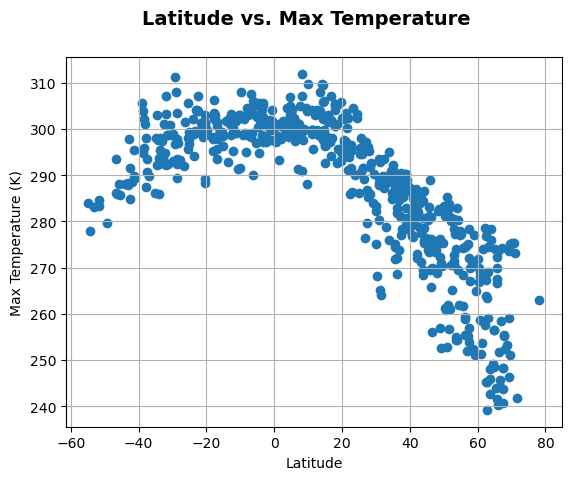

In [41]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"])
plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Max Temperature", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")

plt.savefig("output_data/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

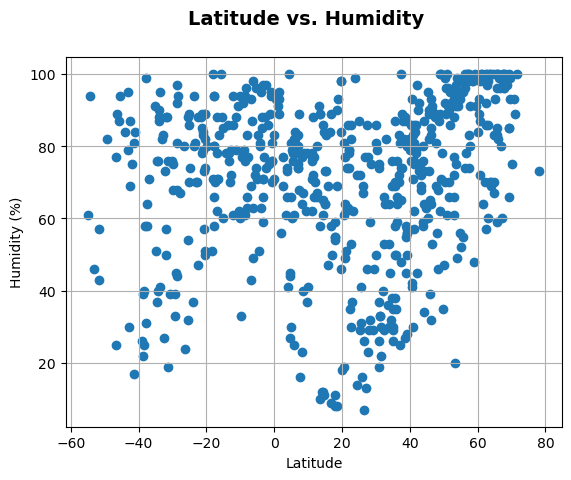

In [42]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"])

# Lines

plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Humidity", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/lat_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

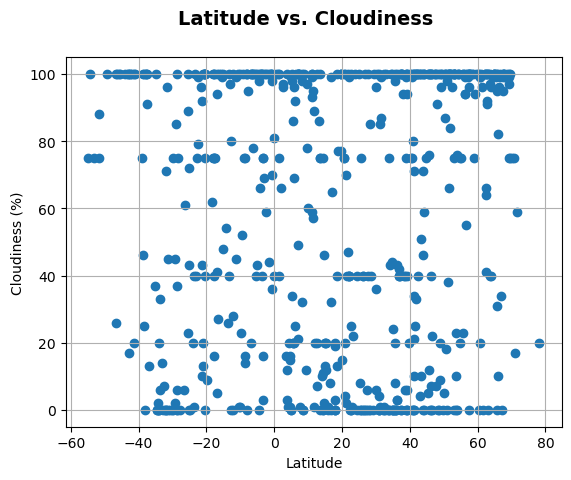

In [43]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"])
plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Cloudiness", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

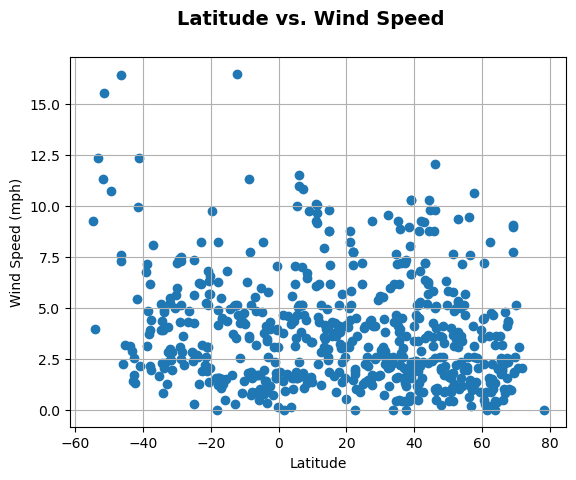

In [40]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"])
plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Wind Speed", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/lat_wind.png")
plt.show()

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
city_weather_df
southern_df
northern_df
# For each of the above plots calculate and plot a linear regression using the steps below
# Set your x and y and reshape to np array
# Fit your Model
# Generate predictions and store in df
# Plot the data for each plot

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


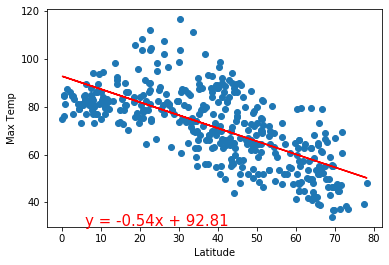

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


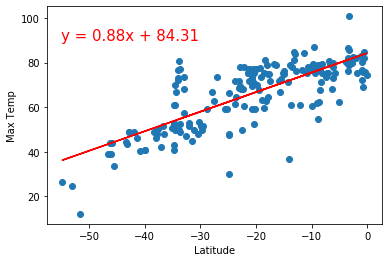

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


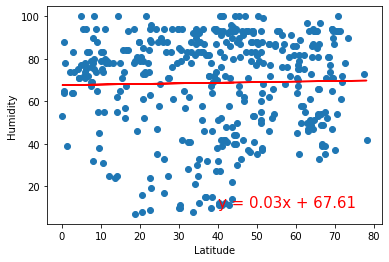

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


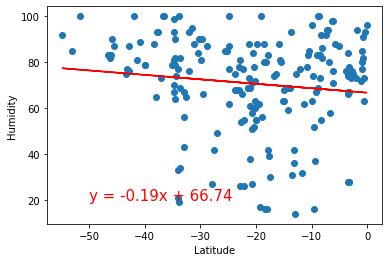

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


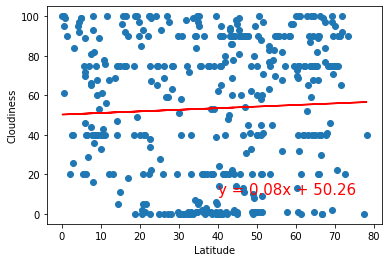

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


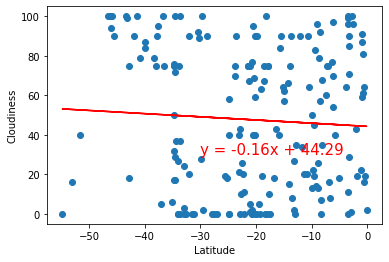

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


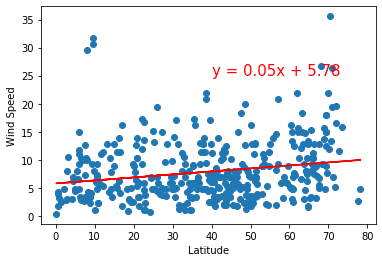

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


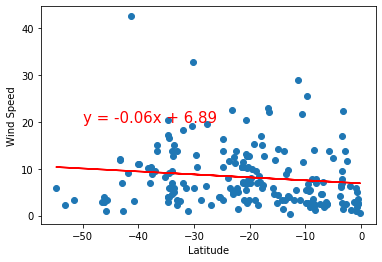